## 导包

In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'

import numpy as np
import pandas as pd
import os
import sympy 
from sympy import *
# from sympy.abc import *
# from sympy import gamma
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #指定默认字体 SimHei为黑体
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
sympy.init_printing(use_latex=True)
x, y, z = symbols('x y z',real=True)

## 正态分布代码  
```
mu,sigma = symbols('mu sigma')
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
```

多维随机变量及其分布

# 二维随机变量

# 边缘分布

# 条件分布

# 相互独立的随机变量

# 两个随机变量的函数的分布

## 连续性随机变量的函数的分布

### 例1  
大炮打靶时，炮弹弹着点(X,Y)(设靶心为原点)服从二维正态分布$N(0,0,\sigma^2,\sigma^2,0)$，求带着点到靶心距离Z的概率密度

解：  
Z的分布函数
$$F_Z(z)=P(Z<z)=\iint_{\sqrt{x^2+y^2}\le z}\frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}dxdy$$

In [ ]:
x,y,z = symbols('x y z')
mu,sigma = symbols('mu sigma')
mu=0
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
fx
fy = (1/(sigma*sqrt(2*pi)))*exp(-(y-mu)**2/(2*sigma**2))
fxy=fx*fy
fxy
fxy = simplify(fxy)
fxy

In [ ]:
# 化为极坐标积分
rho,theta = symbols('rho theta')
fxy_ = fxy.subs({x: rho*cos(theta),y:rho*sin(theta)})
fxy_ = simplify(fxy_)
fxy_
Fz_=Integral(rho*fxy_,(rho, 0, z),(theta, 0, 2*pi))
# 结果
simplify(Fz.doit())
Fz = Piecewise((simplify(Fz.doit()),z>=0),(0,z<0))
Fz

瑞利分布

In [ ]:
# 概率密度
# 瑞利分布
fz = diff(Fz,z)
fz

In [ ]:
fz_list=[]
for i in [0.5,1,2,3,4]:
    fz_list.append(fz.subs(sigma,i))

p = plot(*fz_list,show=False,xlim=(-0.1,10),ylim=(-0.1,1.5))
p[0].line_color='b'
p[1].line_color='g'
p[2].line_color='r'
p[3].line_color='y'
p[4].line_color='c'

p.show()

In [ ]:
Fz_list=[]
for i in [0.5,1,2,3,4]:
    Fz_list.append(Fz.subs(sigma,i))

p = plot(*Fz_list,show=False,xlim=(-0.1,10),ylim=(-0.1,1.2))
p[0].line_color='b'
p[1].line_color='g'
p[2].line_color='r'
p[3].line_color='y'
p[4].line_color='c'

p.show()

### 例2  2001年数学三第12题
设随机变量$X$和$Y$的联合分布是正方形$$G=\{(x,y)|1\le x \le 3,1\le y \le 3\}$$上的均匀分布，试求随机变量$U=|X-Y|$的概率密度$p(u)$

In [ ]:
x, y, u = symbols('x y u')
# X,Y的联合概率密度
fxy = Piecewise((1 / 4, (x >= 1) & (x <= 3) & (y >= 1) & (y <= 3)), (0, True))
fxy
fxy.subs({x: 1, y: 0})
# 设四个点的坐标(1,y1)(x1,3) (x2,1)(3,y2)
f1 = x + u - y
f2 = x - u - y
y1 = solve(f1.subs(x,1),y)
y2 = solve(f2.subs(x,3),y)
x1 = solve(f1.subs(y,3),x)
x2 = solve(f2.subs(y,1),x)
(1,y1)
(x1,3)
(x2,1)
(3,y2)
# U的分布函数
Fu=Piecewise(((4-(3-(u+1))**2)/4,(u>0)&(u<2)),(1,u>=2),(0,u<=0))
Fu
# U的概率密度
fu = diff(Fu,u)
fu

In [ ]:
u_=1.5
p = plot(1,3,x-u_,x+u_,10000*(x-1),10000*(x-3),xlim=(0,5),ylim=(0,5),show=False)
p.show()

### 二维离散型随机变量  
方法类似于一维离散型随机变量

假设随机变量$X1,X2,X3,X4$相互独立且同分布,  
$P\{X_i=0\}=0.6, \ P\{X_i=1\}=0.4 \ (i=1,2,3,4)$  
求行列式$X = \begin{vmatrix}X_1 & X_2 \\ X_3 & X_4\\ \end{vmatrix}$的概率分布

## Z=X+Y的概率分布  
$f_Z(z)=\int_{-\infty}^{\infty}f(z-y,y)dy$  
$f_Z(z)=\int_{-\infty}^{\infty}f(x,z-x)dx$  
***
如果$X$和$Y$相互独立  
卷积公式  
$f_X*f_Y=\int_{-\infty}^{\infty}f_X(z-y)f_Y(y)dy=\int_{-\infty}^{\infty}f_X(x)f_Y(z-x)dx$  
***
$Z=aX+bY$  
$f_X*f_Y=\int_{-\infty}^{\infty}\frac{1}{|a|}f_X(\frac{z-by}{a})f_Y(y)dy=\int_{-\infty}^{\infty}\frac{1}{|b|}f_X(x)f_Y(\frac{z-ax}{b})dx$  


### 例5   
设$X$和$Y$是两个相互独立的随机变量，它们都服从标准正态分布$N(0,1)$，求$Z=X+Y$的概率密度

In [ ]:
x,y,z = symbols('x y z')
mu,sigma = symbols('mu sigma')
f = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
fx = f.subs({mu:0,sigma:1})
fy = f.subs({x:y,mu:0,sigma:1})
fx
fy
fxyz = Integral(fx*fy.subs(y,z-x),(x,-oo,+oo))
fxyz_ = simplify(fxyz.doit())
fxyz
fxyz_

正态分布的可加性  

$若X\sim N(0,1),Y\sim N(0,1)且X和Y相互独立 \\ 
则X+Y\sim N(0,2)$  
$若X\sim N(\mu_1,\sigma_1^2),Y\sim N((\mu_2,\sigma_2^2)且X和Y相互独立 \\ 
则X+Y\sim N(\mu_1+\mu_2,\sigma_1^2+\sigma_2^2)\\
则aX+bY\sim N(a\mu_1+b\mu_2,a^2\sigma_1^2+b^2\sigma_2^2)$  

以上结果还可以推广n个正态分布的随机变量  
***
二项分布和泊松分布也具有可加性  

$X\sim b(n,p),y\sim b(m,p)且X和Y相互独立\Rightarrow X+Y\sim b(n+m,p)$  
即：$P\{X=k\}=C_n^kp^k(1-p)^{n-k},(k=0,1,...,n)\\
P\{Y=k\}=C_m^kp^k(1-p)^{m-k},(k=0,1,...,m)\\
P\{X+Y=k\}=C_{m+n}^kp^k(1-p)^{n+m-k},(k=0,1,...,n)$  
***  
$X\sim \pi(\lambda_1),y\sim \pi(\lambda_2)且X和Y相互独立\Rightarrow X+Y\sim \pi(\lambda_1+\lambda_2)$  
即：$P\{X=k\}=\frac{\lambda_1^k}{k!}e^{-\lambda_1}\\
P\{Y=k\}=\frac{\lambda_2^k}{k!}e^{-\lambda_2}\\
P\{X+Y=k\}=\frac{(\lambda_1+\lambda_2)^k}{k!}e^{-(\lambda_1+\lambda_2)}$

例7  
$对于简单电路中，两电阻的R_1和R_2串联连接,设R_1和R_2相互独立,它们的概率密度均为\\
f(x)=\begin{cases}\frac{10-x}{50} & 0\le x\le 10\\ 0 & 其它\end{cases}\\
求总电阻R=R_1+R_2的概率密度$

In [2]:
x,y,z = symbols('x y z')
f=Piecewise(((10-x)/50,(x>=0)&(x<=10)),(0,True))
integrate(f,(x,-oo,oo))

In [3]:
fx = f.subs(x,x)
fy = f.subs(x,z-x)
fxy = Piecewise((fx*fy, (x>=0)&(x<=10)&(x>=z-10)&(x<=z)))
# fxy = Piecewise((fx*fy, (x>=0)&(x<=10)&(x>=z-10)&(x<=z)&(z>=10)&(z<20)))
simplify(fxy)
fz = Integral(fx*fy,(x,-oo,oo))
fz
simplify(Piecewise((fz.doit(),(z>=10)&(z<20))))
simplify(fz.subs(z,10).doit())

⎧⎧(10 - x)⋅(x - z + 10)                                                       
⎪⎪─────────────────────  for x ≥ 0 ∧ x - z ≥ -10 ∧ x ≤ 10 ∧ x - z ≤ 0         
⎨⎨         2500                                                        for x ≥
⎪⎪                                                                            
⎩⎩          0                             otherwise                           

                                
                                
 0 ∧ x ≥ z - 10 ∧ x ≤ 10 ∧ x ≤ z
                                
                                

∞                                                                          
⌠                                                                          
⎮  ⎧⎛1   x ⎞ ⎛x    z    1⎞                                                 
⎮  ⎪⎜─ - ──⎟⋅⎜── - ── + ─⎟  for x ≥ 0 ∧ x - z ≥ -10 ∧ x ≤ 10 ∧ x - z ≤ 0   
⎮  ⎨⎝5   50⎠ ⎝50   50   5⎠                                               dx
⎮  ⎪                                                                       
⎮  ⎩          0                              otherwise                     
⌡                                                                          
-∞                                                                         

⎧                  2                               2                          
⎪  z⋅Max(0, z - 10)    z⋅Max(0, z - 10, Min(10, z))    (z - 10)⋅Max(0, z - 10)
⎨- ───────────────── + ───────────────────────────── + ───────────────────────
⎪         5000                      5000                         250          
⎩                                                                             

                                                       3                      
   (z - 10)⋅Max(0, z - 10, Min(10, z))   Max(0, z - 10)    Max(0, z - 10, Min(
 - ─────────────────────────────────── + ─────────────── - ───────────────────
                   250                         7500                    7500   
                                                                              

       3                     
10, z))                      
────────  for z ≥ 10 ∧ z < 20
                             
                             

In [5]:
# 计算当10<=z<=20时的概率密度
# 通过正负值的变换来控制Max和Min函数的取值
z1 = symbols('z', positive=True)
z2 = symbols('z', negative=True)
Max((z2+20),20)
fz_ = fz.doit()
fz_
fz_2 = fz_.subs(z,(z1+10))
fz_2
fz_2 = fz_2.subs(z1,(z-10))
fz_2
fz_2 = fz_2.subs(z,(z2+20))
fz_2
fz_2 = fz_2.subs(z2,(z-20))
fz_2 = simplify(fz_2)
fz_2
fz_2.subs(z,10)
simplify(fz_2*15000) # 结果
# fz_.subs(z,(z2+20))


In [6]:
# 计算当0<=z<=10时的概率密度
z1 = symbols('z', positive=True)
z2 = symbols('z', negative=True)
fz_ = fz.doit()
fz_1 = fz_.subs(z, z1).subs(z1, z2 + 10).subs(z2, z - 10)
fz_1 = simplify(fz_1)  # 结果
fz_1

⎧    ⎛ 2             ⎞                        
⎪  z⋅⎝z  - 60⋅z + 600⎠                        
⎪  ───────────────────     for z ≥ 0 ∧ z < 10 
⎪         15000                               
⎪                                             
⎨     3      2                                
⎪    z      z    2⋅z   8                      
⎪- ───── + ─── - ─── + ──  for z ≥ 10 ∧ z < 20
⎪  15000   250    25   15                     
⎪                                             
⎩           0                   otherwise     

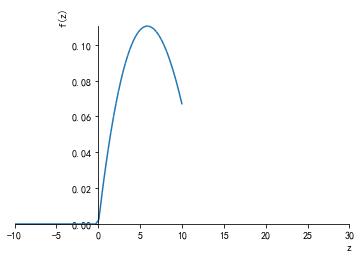

In [7]:
# 最终结果
fz_1
fz_2
fz_f = Piecewise((fz_1,(z>=0)&(z<10)),(fz_2,(z>=10)&(z<20)),(0,True))
fz_f
plot(fz_f,xlim=(-10,30)) # sympy 中的plot只能绘制(-10,10)之间的图像


⎧    ⎛ 2             ⎞                        
⎪  z⋅⎝z  - 60⋅z + 600⎠                        
⎪  ───────────────────     for z ≥ 0 ∧ z < 10 
⎪         15000                               
⎪                                             
⎨     3      2                                
⎪    z      z    2⋅z   8                      
⎪- ───── + ─── - ─── + ──  for z ≥ 10 ∧ z < 20
⎪  15000   250    25   15                     
⎪                                             
⎩           0                   otherwise     

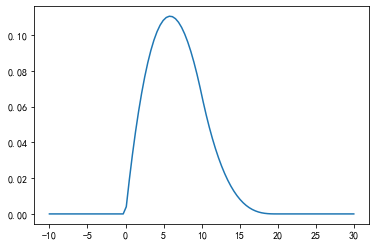

In [10]:
# 替换方案
x1 = np.linspace(-10,30,100)
# y1 = fz_f.subs(z,x1) # 这样不行
# y1
# x1
y1 = []
for x1_ in x1:
    y1.append(fz_f.subs(z,x1_))
# y1
plt.plot(x1,y1)

### 2007年数学三第23题    
$设二维随机变量(X,Y)的概率密度为\\
f(x,y)=\begin{cases}2-x-y & 0<x<1,0<y<1\\0 & 其它 \end{cases} \\
求(I)P\{X>2Y\};(II)求Z=X+Y的概率密度f_Z(z)
$

In [ ]:
x,y,z = symbols('x y z')
fxy = Piecewise((2-x-y,(x>0)&(x<1)&(y>0)&(y<1)),(0,True))
fxy
Integral(fxy,(x,0,1),(y,0,1)).doit() # 说明是概率密度
# X>2Y概率最终结果
Integral(fxy,(y,0,x/2),(x,0,1)).doit()

In [ ]:
# 区域绘图
z_=1
p = plot(0,1,x/2,z_-x,10000*(x-0),10000*(x-1),xlim=(-1,2),ylim=(-1,2),show=False)
p.show()

In [ ]:
fz = Integral(fxy.subs(y,(z-x)),(x,-oo,oo))
fz
fz_ = fz.doit()
fz_

In [ ]:
z1 = symbols('z', positive=True)
z2 = symbols('z', negative=True)
# 计算区间(0,1)
fz_1 = fz_.subs(z,z1).subs(z1,(z2+1)).subs(z2,(z-1))
simplify(fz_1)
# 计算区间(1,2)
fz_2 = fz_.subs(z,(z1+1)).subs(z1,(z-1)).subs(z,(z2+2)).subs(z2,(z-2))
fz_2 = simplify(fz_2)
fz_2

In [ ]:
# Z=X+Y最终结果
fz_f = Piecewise((fz_1,(z>0)&(z<1)),(fz_2,(z>1)&(z<2)),(0,True))
fz_f
plot(fz_f,xlim=(-2,4))

### 考研题  
$设随机变量X与Y独立，X服从正态分布N(\mu,\sigma^2),Y服从[-\pi,\pi]上的均匀分布。\\
试求Z=X+Y的概率密度，分布计算结果用标准正态分布函数\Phi(x)表示\\
其中:\Phi(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^x e^{-\frac{t^2}{2}}dt$

In [ ]:
x,y,z = symbols('x y z')
mu,sigma = symbols('mu sigma')
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
fy = Piecewise((1/(2*pi),(y>=-pi)&(y<=pi)),(0,True))
fx
fy

In [ ]:
# 利用卷积公式
fz = Integral(fx*fy.subs(y,(z-x)),(x,-oo,oo))
fz
fz = fz.doit()
fz
simplify(fz)
plot(fz.subs({mu:0,sigma:1}))

In [ ]:
expand(erf(x))
plot(erf(x))

In [ ]:
x, t = symbols('x t')
ef = (2/sqrt(pi))*integrate(exp(-t**2),(t,-oo,x))
ef
simplify(ef)
# 高斯分布与误差函数的关系
Integral(fx.subs({mu:0,sigma:1}),(x,-oo,x)).doit()
Integral(fx.subs({x:sqrt(2)*x,mu:0,sigma:1}),(x,-oo,x)).doit()
Integral(fx.subs({x:2*x,mu:0,sigma:1}),(x,-oo,x)).doit()
Integral(fx.subs({x:3*x,mu:0,sigma:1}),(x,-oo,x)).doit()

$标准正态分布与误差函数的关系\\
erf(\frac{x}{\sqrt{2}})=2\Phi(x)-1\\
erf(x)=2\sqrt{2} \Phi(\sqrt{2}x)-1\\
erf(ax)=2\sqrt{2}a \Phi(\sqrt{2}ax)-1\\
\Phi(x)=\frac{erf(\frac{x}{\sqrt{2}})+1}{2}\\
\Phi(\sqrt{2} x)=\frac{erf(x)+1}{2\sqrt2}\\
\Phi(ax)=\frac{erf(a\frac{x}{\sqrt{2}})+1}{2a}$

## 积Z=XY与商Z=X/Y的分布

$设X,Y是二维连续型随机变量，其概率密度为f(x,y)\\
则随机变量Z=Y/X的概率密度为\\
f_{Y/X}(z)=\int_{-\infty}^{\infty}|x|f(x,xz)dx\\
随机变量Z=XY的概率密度为\\
f_{XY}(z)=\int_{-\infty}^{\infty}{1\over|x|}f(x,{z\over x})dx$

###  例8  
$设随机变量X,Y相互独立他们的概率密度均为\\
p(x)=\begin{cases}e^{-x}&x>0\\0&x\le 0\end{cases}\\
求Z=Y/X概率密度$

In [ ]:
x,y,z = symbols('x y z')
fx = Piecewise((exp(-x),x>0),(0,True))
fx
integrate(fx,(x,-oo,oo)) # 概率为1，说明是概率密度
fy = fx.subs(x,y)
fy
fxy = fx*fy
simplify(fxy)

In [ ]:
x1 = symbols('x',positive=True)
z1 = symbols('z',positive=True)
x2 = symbols('x',negative=True)
z2 = symbols('z',negative=True)
fz_ = Integral(fxy.subs({x:x1,y:(z*x)}).subs(z,z1)*Abs(x),(x,-oo,oo)) # 带绝对值的不好求
simplify(fz)
# x>0,z>0
fz1 = Integral(fxy.subs({y:(z*x)}).subs(z,z1)*x,(x,0,oo)) # z用正值替换很重要
simplify(fz1)

fz = Piecewise((fz1.doit().subs(z1,z),z>0),(0,True)) # 最后结果
fz
plot(fz)

### 例9  
$某保险公司提供一个险种，保险费Y和保险赔付X的概率密度分别为\\
h(y)=\begin{cases}{y\over 25}e^{-{y\over 5}}&y>0\\0&y\le 0\end{cases}\ g(x)=\begin{cases}{1\over 5}e^{-{x\over 5}}&x>0\\0&x\le 0\end{cases}\\
设X与Y相互独立,求Z=Y/X的概率密度$

In [ ]:
x,y,z = symbols('x y z')
hy = Piecewise(((y/25)*exp(-(y/5)),y>0),(0,True)) 
gx = Piecewise(((1/5)*exp(-(x/5)),x>0),(0,True)) 
hy
gx
integrate(hy,(y,-oo,oo))
integrate(gx,(x,-oo,oo))
fxy = simplify(gx*hy)
fxy

In [ ]:
z1 = symbols('z',positive=True)
fz_ = Integral(fxy.subs({y:(x*z),z:z1})*x,(x,0,oo))
fz_
fz_ = fz_.doit()
fz_
# fz = Piecewise((factor(fz_),z1>0),(0,True)) # 这么写不行，要换回z
fz = Piecewise((factor(fz_.subs(z1,z)),z>0),(0,True)) # 最后结果
fz
plot(fz)

### 例10  
$设随机变量的概率密度为\\
f(x,y)=\begin{cases}x+y&0<x<1,0<y<1\\0&其它\end{cases}\\
求Z=XY的概率密度$

In [ ]:
x,y,z = symbols('x y z')
z1 = symbols('z',positive=True)
z2 = symbols('z',negative=True)
fxy = Piecewise((x+y,(x>0)&(x<1)&(y>0)&(y<1)),(0,True))
# fxy = Piecewise((x+y,(x>0)&(x<1)&(y>0)&(y<1)&(z>0)&(z<x)),(0,True))
fxy
integrate(fxy,(x,-oo,oo),(y,-oo,oo))

In [ ]:
# 条件太多，得不到正确的结果，重写
# fxy.subs({y:(z/x),z:z1})
# fz_ = Integral(fxy.subs({y:(z/x),z:z1})/x,(x,z1,1))
# fz_ = Integral(fxy.subs({y:(z/x)}).subs(z,z1).subs(z1,z2+1).subs(z2,z-1)/x,(x,z,1))
# fz_ = Integral(fxy.subs({y:(z/x)})/x,(x,z,1))
# fz_ = Integral(fxy.subs({y:(z/x)}).subs(z,0.5)/x,(x,0.5,1))
fz_ = Integral(fxy.subs({y:(z/x)}),(x,z,1))
fz_
fz_2 = fz_.doit()
fz_2
fz_2.subs(z,(z2+1)).subs(z2,z-1)

# fz_
# fz_ = simplify(fz_.doit())
# fz_

In [ ]:
# 重写
fz_1 = Piecewise((1+z/x**2,(x>z)&(z>0)&(z<1)),(0,True))
fz_1
fz = Integral(fz_1,(x,z,1)).doit().subs(z,1+z2).subs(z2,z-1)# 最终结果
fz
fz.args[0]
# 重写
fz_2 = Piecewise((fz.args[0][0],(z>0)&(z<1)),(0,True)) # 最终结果
fz_2
# dir(fz)
plot(fz_2,xlim=(-0.5,2),ylim=(-0.5,3))

##### fz.args 重要属性
fz.args


### 1999年数学四第11题
$设二维随机变量(X,Y)在矩形上服从均匀分布\\
G=\{(x,y)|0\le x\le 2,0\le y\le 1\}\\
试求边长为x和y的矩形面积S的概率密度f(s)$

In [ ]:
# Z=XY
x,y,z = symbols('x y z')
z1 = symbols('z',positive=True)
z2 = symbols('z',negative=True)
fxy = Piecewise((1/2,(x>0)&(x<=2)&(y>=0)&(y<=1)),(0,True))
fxy

In [ ]:
fxz = Piecewise((1/2,(x>0)&(x<=2)&(z>0)&(z<x)&(z<2)),(0,True))
fxz
fz1 = Integral(fxz/x,(x,z,2))
fz2 = fz1.doit().subs(z,z1).subs(z1,z2+2).subs(z2,z-2) 
# 重写
fz2 = Piecewise((fz2, (z>0)&(z<2)),(0,True)) # 最终结果
fz2
# plot(fz2) # log打印不出来
# 改用matplotlib打印
x_1 = np.linspace(-1,5,100)
z_1=[]
for x1 in x_1:
    z_1.append(fz2.subs(z,x1).evalf())
#     if isinstance(fz2.subs(z,x1).evalf(), Add):
#         z_1.append(0)
#     else:
#         z_1.append(fz2.subs(z,x1).evalf())
# z_1
plt.plot(x_1,z_1)
integrate(fz2,(z,0,oo)).evalf()

## Z=max{X,Y}与Z=min{X,Y}的分布  
$F_{max}(z)=P\{max\{X,Y\}\le z\}=P\{X\le z,Y\le z\}=P\{X\le z\}P\{Y\le z\}=F_X(z)F_Y(z)\\
F_{min}(z)=P\{min\{X,Y\}\le z\}=1-P\{min\{X,Y\}>z\}=1-P\{X>z,y>z\}=\ 1-P\{X>z\}P\{y>z\}=\ 1-[1-P\{X\le z\}][1-P\{Y\le z\}]=1-[1-F_X(z)][1-F_Y(z)]
$  
以上情况可以推广到n个相互独立的随机变量

### 例11  
$设随机变量X,Y的概率密度为\\
f(x,y)=\begin{cases}{e\over e-1}e^{-(x+y)}&0<x<1,y>0\\0&其它\end{cases}\\
验证X与Y相互独立并求函数U=max\{X,Y\}的分布函数应该对应的概率密度$

In [ ]:
x,y,z,u = symbols('x y z u')
# z1 = symbols('z',positive=True)
# z2 = symbols('z',negative=True)
fxy = Piecewise(((E/(E-1))*exp(-x-y),(x>0)&(x<1)&(y>0)),(0,True))
fxy
integrate(fxy,(x,-oo,oo),(y,-oo,oo))

In [ ]:
fx = Integral(fxy,(y,0,oo)).doit()
fy = Integral(fxy,(x,0,1)).doit()
fx
fy
simplify(fx)
simplify(fy)
# 说明独立性
simplify(fx*fy) # 说明相互独立


In [ ]:
x1 = symbols('x', negative=True)
# Integral(fx, (x, 0, x)).doit()
Fx = Integral(fx, (x, 0, x)).doit().subs(x, 1 + x1).subs(x1, x - 1)  # x有范围,要处理
Fy = Integral(fy, (y, 0, y)).doit()
simplify(Fx)
Fy
Fu = simplify(Fx.subs(x, z) * Fy.subs(y, z))
Fu

"***"
# 在积分过后可能要做一下简单的重写处理
# 重写Fx,Fy
Fx_ = Piecewise((Fx.args[1][0], (x > 0) & (x < 1)), (1, x >= 1),
                (0, x <= 0)).subs(x, z)
Fy_ = Piecewise((Fy.args[1][0], (y > 0)), (0, y <= 0)).subs(y, z)
simplify(Fx_)
Fy_

Fu_ = simplify(Fx_ * Fy_)  # 最终结果
Fu_
fu_ = simplify(diff(Fu_, z))  # 最终结果
fu_
plot(Fu_)
plot(fu_)

### 例12  
$设二维随机变量(X,Y)的分布律为 \\
\begin{array}{c|cccccc}
YX & 0 & 1 & 2 & 3 & 4 & 5\\
\hline
0 & 0.00 & 0.01 & 0.03 & 0.05 & 0.07 & 0.09 \\
1 & 0.01 & 0.02 & 0.04 & 0.05 & 0.06 & 0.08\\
2 & 0.01 & 0.03 & 0.05 & 0.05 & 0.05 & 0.06\\
3 & 0.01 & 0.02 & 0.04 & 0.06 & 0.06 & 0.05\\
\end{array}\\
求V=max\{X,Y\}和U=min\{X,Y\}的分布律$

In [ ]:
np.set_printoptions(threshold=np.inf, precision=2, suppress=True)
arr1 = np.array([[0.00, 0.01, 0.03, 0.05, 0.07, 0.09],
                 [0.01, 0.02, 0.04, 0.05, 0.06, 0.08],
                 [0.01, 0.03, 0.05, 0.05, 0.05, 0.06],
                 [0.01, 0.02, 0.04, 0.06, 0.06, 0.05]])
V1={}
U1={}
# V1[0]=1
for i in range(4):
    for j in range(6):
        if max(i,j) in V1.keys():
            V1[max(i,j)]+=arr1[i,j]
        else:
            V1[max(i,j)]=arr1[i,j]
        if min(i,j) in U1.keys():
            U1[min(i,j)]+=arr1[i,j]
        else:
            U1[min(i,j)]=arr1[i,j]

df_v= pd.DataFrame(data=V1.values(),index=V1.keys(),columns=['p']).T
df_v

df_u= pd.DataFrame(data=U1.values(),index=U1.keys(),columns=['p']).T
df_u
df_v.iloc[0,:].sum()
df_u.iloc[0,:].sum()

### 2012年数学三第23题    
$设随机变量X与Y相互独立，且都服从参数为1的指数分布，求V=min\{X,Y\}的概率密度$  

In [ ]:
x,y,z,v = symbols('x y z v')
fx = Piecewise((exp(-x),x>0),(0,True))
fy = Piecewise((exp(-y),y>0),(0,True))
fx
fy
Fx = Integral(fx,(x,0,x)).doit()
Fy = Integral(fy,(y,0,y)).doit()
Fx
Fy

In [ ]:
Fv = 1-(1-Fx.subs(x,v))*(1-Fy.subs(y,v))
Fv = simplify(Fv) # 最终结果
Fv
fv = diff(Fv,v)# 最终结果
fv
plot(fv)